In [1]:
import pandas as pd
import pickle
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('all_tweets_locations_final.pickle', "rb") as f:
    tweets = pickle.load(f)

In [5]:
#Create a dataframe with all tweets over time
tweetstime = tweets[["created_at"]]
tweetstime = tweetstime.set_index("created_at")
tweetstime["tweets_count"] = 1
tweetstime = tweetstime.resample("M").sum()

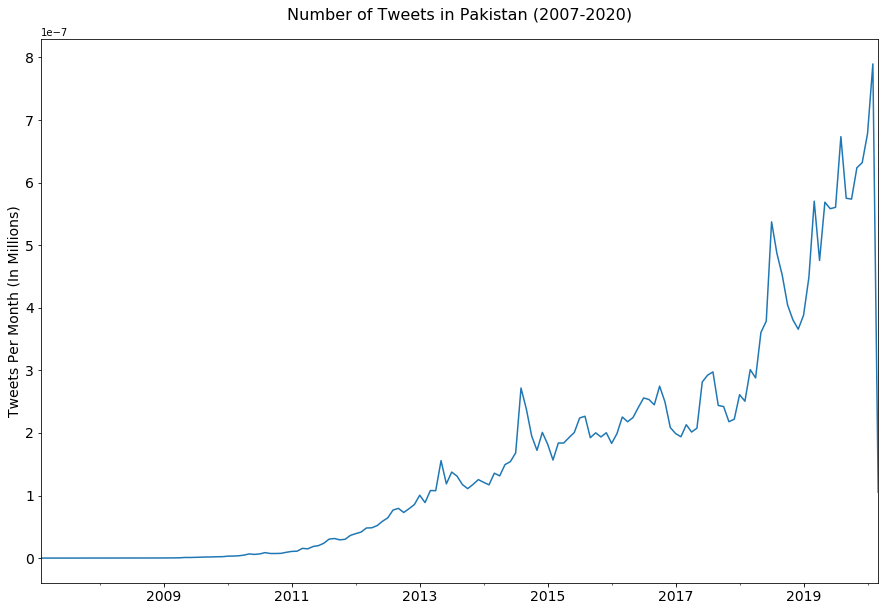

In [22]:
#Plot and save number of tweets over time figure
tweetstime["tweets_count"] = tweetstime["tweets_count"] / 1000000

cols_plot = ["tweets_count"]
axes = tweetstime["tweets_count"].plot(marker='', alpha=1, linestyle='-', figsize=(15, 10), subplots=False, legend = False)
axes.set_ylabel('Tweets Per Month (In Millions)', fontsize = 14)
axes.set_xlabel('',)
axes.set_title('Number of Tweets in Pakistan (2007-2020)', fontsize = 16, pad=20)
axes.tick_params(axis='both', which='major', labelsize=14)


plt.savefig("new_figs/Total Tweets Per Month (2007-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)


In [15]:
#Create a dataframe of tweets by language
language = tweets[["tweet_lang"]]
language["lang_count"] = 1
language = language.groupby(["tweet_lang"]).sum()
language = language.sort_values(by='lang_count', ascending=False)

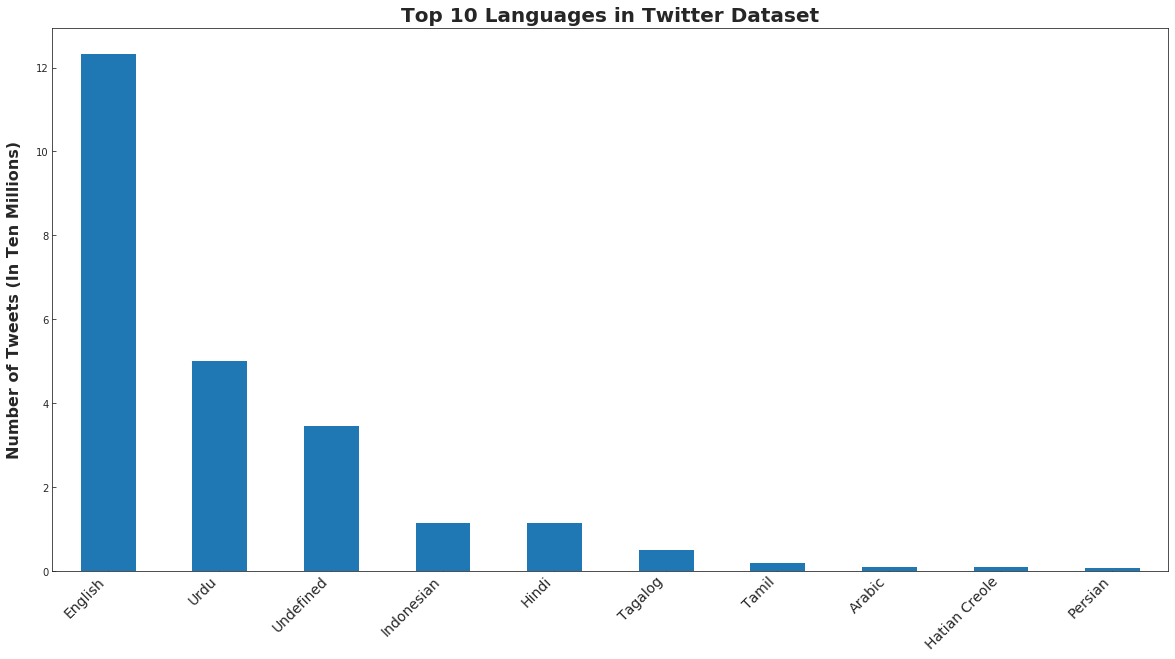

In [24]:
#Plot number of tweets per language
language["lang_count"] = language["lang_count"] / 10000000
language_list = ["English", "Urdu", "Undefined", "Indonesian", "Hindi", "Tagalog", "Tamil", "Arabic", "Hatian Creole", "Persian"]

with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=language.head(10)
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Number of Tweets (In Ten Millions)',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_xlabel('', fontweight="bold", labelpad = 14)
    ax.tick_params(which='both',direction='in',pad=3)
    ax.set_xticklabels(language_list, rotation = 45, ha = "right", fontsize = 14)
    ax.set_title("Top 10 Languages in Twitter Dataset", fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("new_figs/Top 10 Languages in Twitter Dataset.pdf", dpi=300, bbox_inches ="tight", transparent = True)


In [26]:
#Create a dataframe of tweets per user
date = tweets["created_at"]
ID = tweets["user_id"]
users_df = pd.DataFrame(list(zip(date, ID)), columns =['Date', 'User_ID']) 
users_df["tweets_per_user_count"] = 1
users_df = users_df.groupby(["User_ID"]).sum()
users_df = users_df.sort_values(by='tweets_per_user_count', ascending=False)
users_df = users_df.reset_index()

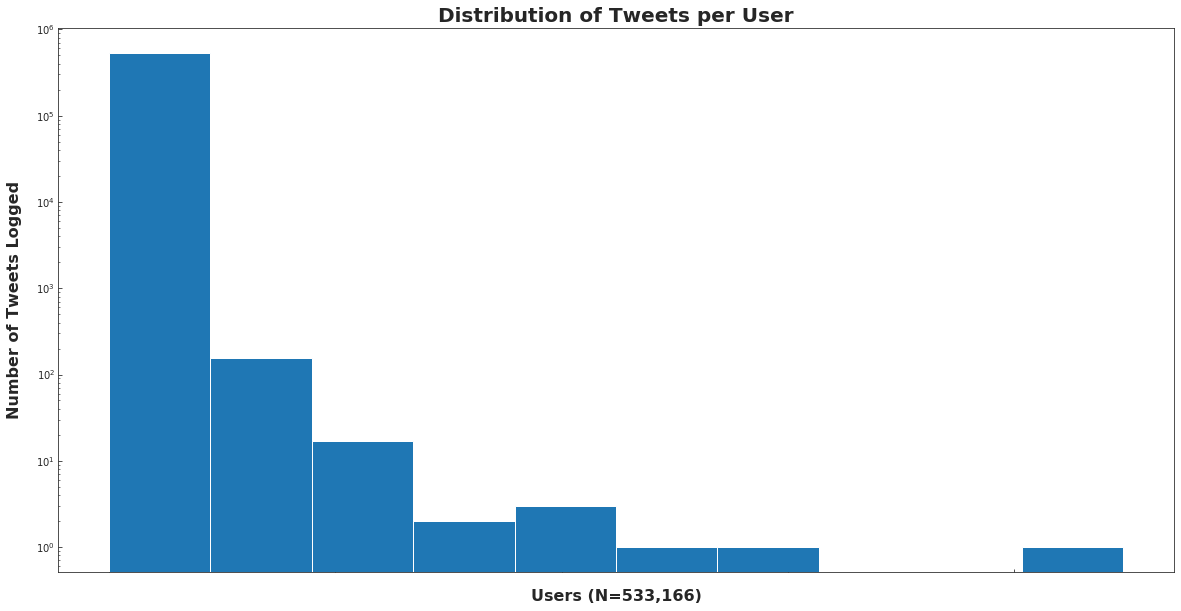

In [37]:
#Plot distribution of tweets per user
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot= users_df["tweets_per_user_count"]
    data_to_plot.plot(ax=ax,kind='hist', bins=10)
    ax.set_ylabel('Number of Tweets Logged',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.set_yscale("log")
    ax.set_xlabel('Users (N=533,166)', fontweight="bold", labelpad = 14, fontsize =16)
    ax.tick_params(which='both',direction='in',pad=3)
    ax.set_xticklabels("", fontsize = 14)
    ax.set_title("Distribution of Tweets per User", fontweight="bold", fontsize=20)
    
plt.savefig("new_figs/Total Tweets Per User (2007-2010).pdf", dpi=300, bbox_inches ="tight", transparent = True)